# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os


offline.init_notebook_mode()
from collections import Counter

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


data source: https://www.kaggle.com/c/donorschoose-application-screening/data

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

### Project Data

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*90)
print("The attributes of data :", project_data.columns.values)
print('-'*90)
project_data.head(2)

Number of data points in train data (109248, 17)
------------------------------------------------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']
------------------------------------------------------------------------------------------


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1

### Resource 

In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(5)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

    price  
0  149.00  
1   14.95  
2    8.45  
3   13.59  
4   24.95

In [5]:
print("Number of resources required by id-p069063:",resource_data.groupby('id').get_group('p069063')['quantity'].sum())

Number of resources required by id-p069063: 13


<b> Summary</b>
  
  The number of datapoints are more in resource_data as a project might need multiple resources.  for example we can see for the project id -p069063 , it required 13 resources.

# 1.2 Data Analysis

Number of projects thar are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects thar are not approved for funding  16542 , ( 15.141695957820739 %)


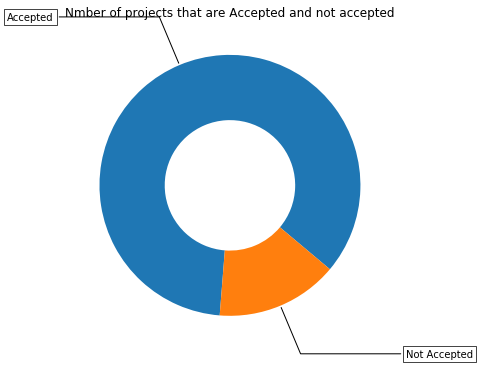

In [6]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()

print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

<b> Summary </b>
* 85% of total projects i.e 92706 of  109248 are  approved for funding 
* 15 % of total projects failed to secure funding.
* It is an Imbalanced dataset

### 1.2.1 Univariate Analysis: School State

In [7]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']



In [8]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


In [9]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.xticks(rotation=90)
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [10]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    #accepted project count
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    #total number of submitted project count based on the category
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    #mean of submitted project_coubnt
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

In [11]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


<b>SUMMARY</b>: 
* Every state has greater than 80% success rate in approval. And The average approval rate for the projects submitted from all 50 state is 85 . From the plot, we can understand that there is a  huge variability in number of project submitted as the from CA to VT , the number of project submitted falls very sharply. it is also understandable that the rate of acceptance varies from state to state.
* Interms of acceptance rate , DL shows the heightest rate(89.79~90%) and lowest rate of acceptance is noted in State VT(80% )
* However interms of total project submission, CA tops the chart with 15388(85% acceptance rate) projects followed by TX with more than 50% less project submission( 7396 project and 81% acceptance rate ) and VT has least number of project submission for approval with only 80 projects. 


### 1.2.2 Univariate Analysis: teacher_prefix

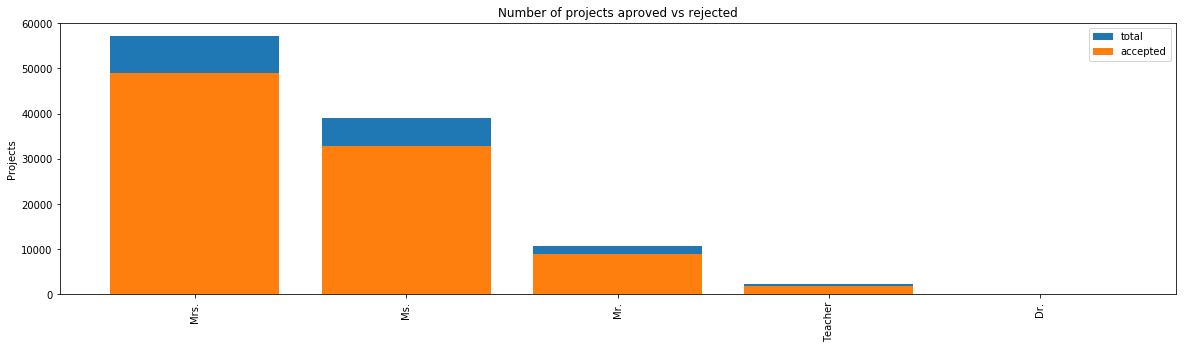

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [12]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

* <b> Summary </b>
    * There is a variability interms of total project submitted by teachers with different prefixes.
    * The project submission count is higher for female teachers than male counterpart. However, among female teachers, Mrs i.e married teachers have higher number of project submission along with higher acceptance rate than unmarried female teachers. 

    * Teacher with Mrs prefix submitted highest number of projects( 57269) and Teacher with Dr. prefic submitted lowest number of projects (13). 
    *  It is evident that  teachers with  prefix Mrs, Ms and Mr have high number of project submission and high acceptance rate (close to the average acceptance percentage)

### 1.2.3 Univariate Analysis: project_grade_category

In [13]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


* <b> Summary </b>
    * Although Number project submission changes by grade , The average rate of approval varies little bit   from 84% to 83%
    * Grades 3-5 without being the highest in terms of total project approval shows  highest rate of approval (85.43%).
    * Grades 9-12 has lowest rate of approval among grades . 

### 1.2.4 Univariate Analysis: project_subject_categories

In [14]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [15]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories  
0             Literacy_Language  
1  History_Civics Health_Sports

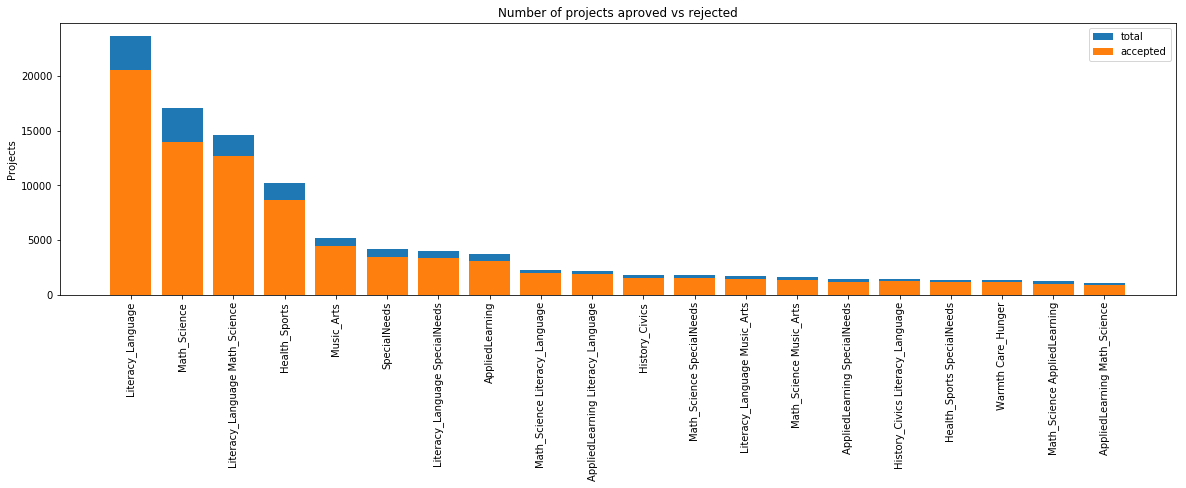

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [16]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

* <b> Summary </b>
    * From the graph of top 20 categories, Literacy_Language being highest in terms of total project submission shows the highest Number of submission (23655) followed by Math_Science (17072)  that has acceptance rate(81.95%) lower than the average acceptance rate with 17072 project submission.

    * However , the combination of categories appear quite often. For instance '<I>Literacy_Language Math_Science</I>' category is 3rd  highest category on basis of total number of submission and the combination actually has higher acceptance rate than 'Math_Science' and 'Literacy_Language' when they appear alone. On the other hand , the combined category of 'AppliedLearning Math_Science' shows least acceptance rate (81.27% ) along with least number of total submission (1052)

    * The category 'Warmth Care_Hunger '  has very high chance of getting approval with 92.5% acceptance rate. 

In [17]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

In [18]:
print(my_counter)


Counter({'Literacy_Language': 52239, 'Math_Science': 41421, 'Health_Sports': 14223, 'SpecialNeeds': 13642, 'AppliedLearning': 12135, 'Music_Arts': 10293, 'History_Civics': 5914, 'Warmth': 1388, 'Care_Hunger': 1388})


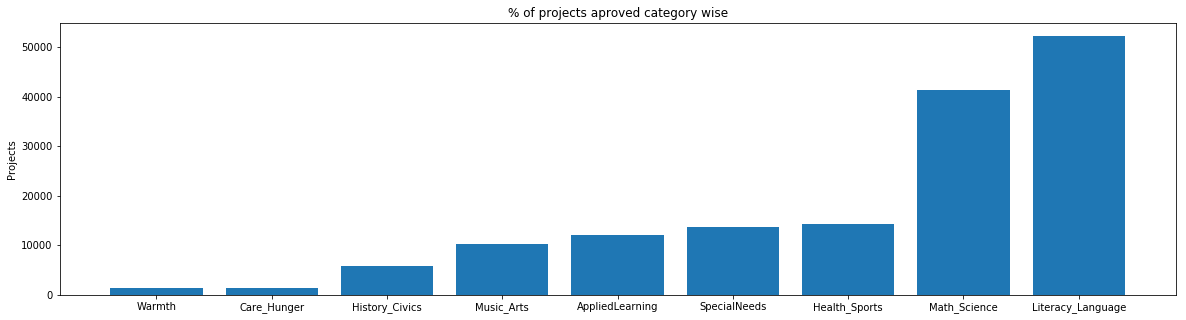

In [19]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [20]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


* <b> Summary </b>
    * Instead of having combination of different categories , by breaking them into individual categories , it can be seen that the number of project submitted with category warmth is only 1388 and for literacy_language , the number of project submitted is 52239. This explains that there is large variability of appearence among the categories 

### 1.2.5 Univariate Analysis: project_subject_subcategories

In [21]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [22]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  
0             Literacy_Language                  ESL Literacy  
1  History_Civics Health_Sports  Civics_Government TeamSports

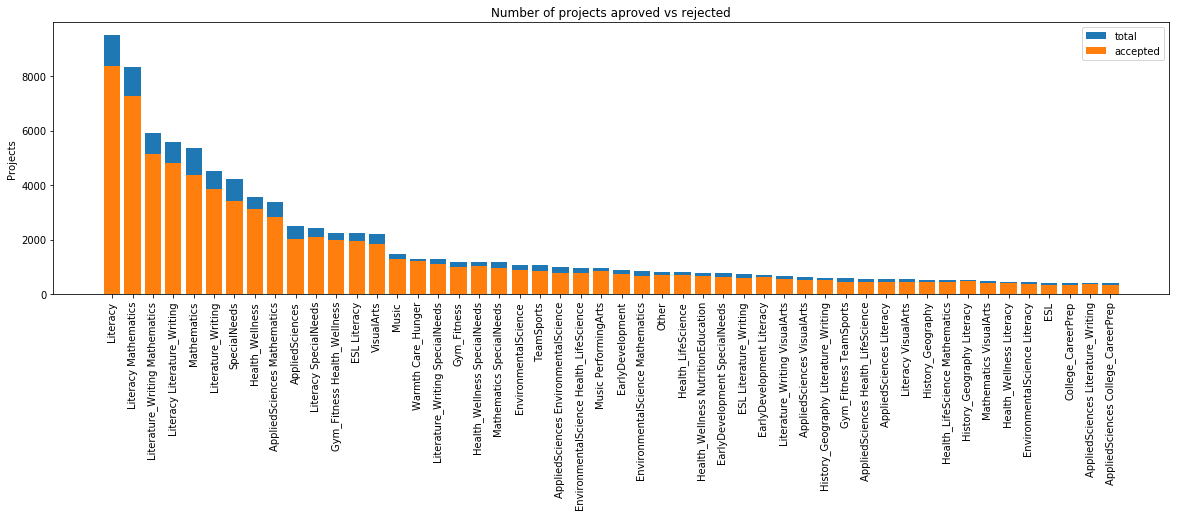

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [23]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

* <b> Summary </b>
    * Here Literacy leads the chart on basis of total number of project submission(9486) with 88.24% chance of being accepted .followed by Literacy Mathematics(8325) that has accepted rate of 87%.
    *  The number of  projects with category as  Mathematics is 5379 with 81% of acceptance rate . However , for the sub-category ''Literature_Writing Mathematics' the acceptance rate (86.7%) is more than the average rate as well as more than  'Mathematics' as individual sub-category. 

    * The sub-category ' AppliedSciences College_CareerPrep ' has least number of total project( 405)  with low chance of acceptance (81.4%)

In [24]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

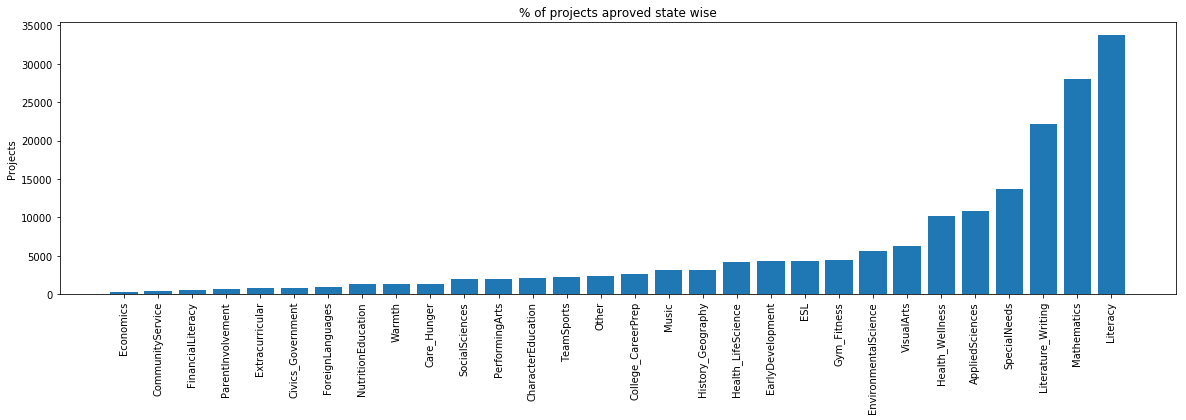

In [25]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.xticks(rotation=90)
plt.show()

In [26]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


* <b> Summary </b>
    * Instead of having combination of different sub-categories , by breaking them into individual sub-categories , it can be seen that the number of project has sub-category 'Economics ' is only 269 and for 'Literacy'  , the number of project has this sub-category is 33700. This explains that there is large variability of occurance among the sub-categories 

### 1.2.6 Univariate Analysis: Text features (Title)

4     19979
5     19677
3     18691
6     14824
7     10631
2      8733
8      7289
9      5383
10     3968
1        31
11       30
12       11
13        1
Name: project_title, dtype: int64


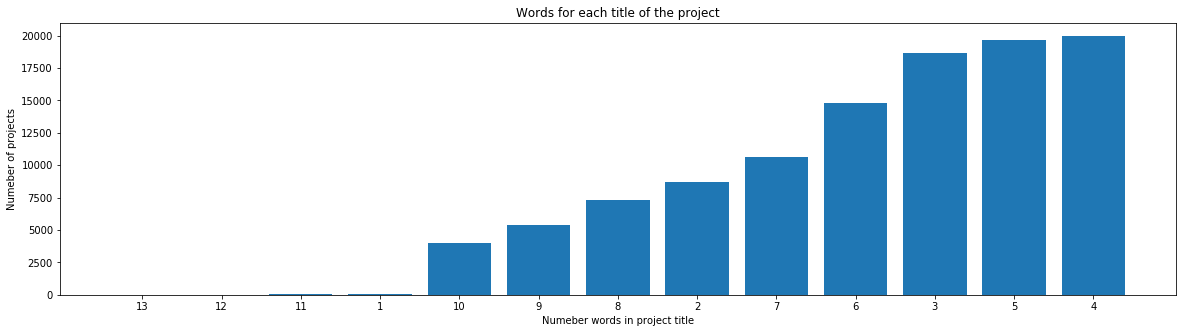

In [27]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
print(word_count)
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [28]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

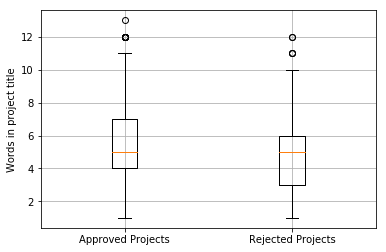

In [29]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

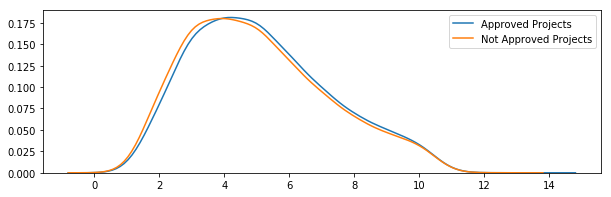

In [30]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

* <b> Summary: </b>
     * Most of the projects have 4 words in their title, only one project has 13 words in it's title. A few projects have 11 and 12 words in their titles. 
     * From the bar plot , it is evedient that most of the projects have titles with 3,5,6 words 
     * From the box plot , although the median of the word counts in  titles for approved projects and rejected projects are almost same (5) , their distributions are different. 
     * Approved project boxplot of title has threshold from 1 to 11, where as the reject project boxplot of title has threshold from 1 to 10.
     * From PDF of number of wordsin both type of projects, It can be said that the number of words in  titles of  approved projects are slightly higher than the number of words in titles of the rejected project.

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [31]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [32]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

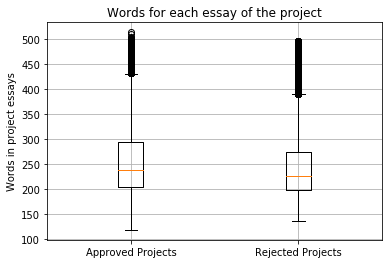

In [33]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

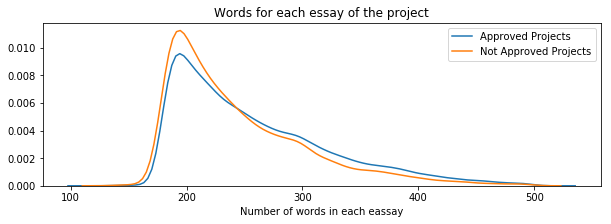

In [34]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

<b> Summary </b>

* From the boxplot , it can be seen that the median of number of words in essay of approved projects and rejected projects are mostly same( around 250-260). However , they have different distributions.

* The threshold word count in essay in approved projects ranges from 125 to 425

* The KDE plot of  approved project is slightly above the distribution of rejected project. So number of words in essay of approved projects are slightly than the rejected project. 

### 1.2.8 Univariate Analysis: Cost per project

In [35]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [36]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [37]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [38]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

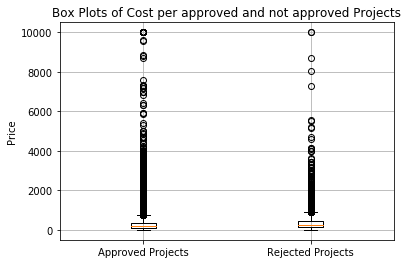

In [39]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

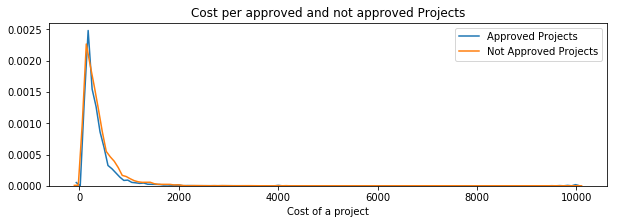

In [40]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [41]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

* <b> Summary </b>
    * From the PDF of cost of the project , it can be said that the the cost of the 'not approved projects' are slightly higher than the approved projects . As the plots are overlapping , it's difficult to interpret much information from that . 
    * Percentile plot shows that for any percentile, the cost of the rejected projects tend to be  higher than the accepted projects. For instance , at the 50th percentile , the cost of approved project is  199k and for rejected project 263.145k in USD 
    * The maximum price for any project should be set lower than 10,000 USD. 
    *

<h3>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</h3>

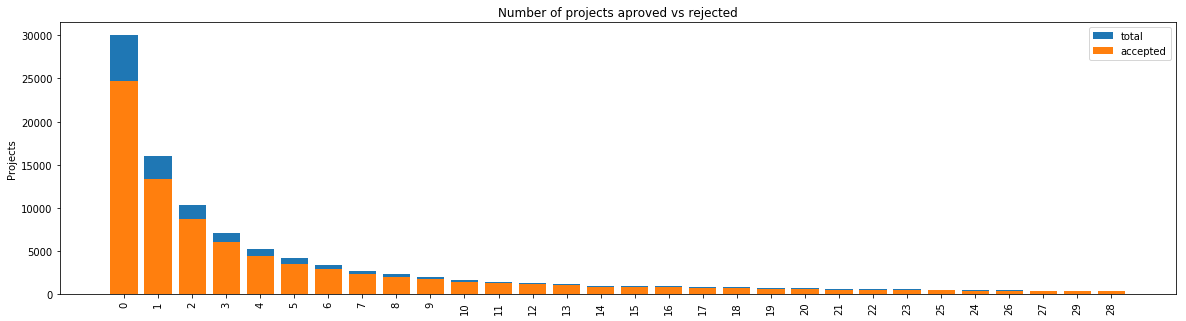

   teacher_number_of_previously_posted_projects  project_is_approved  total  \
0                                             0                24652  30014   
1                                             1                13329  16058   
2                                             2                 8705  10350   
3                                             3                 5997   7110   
4                                             4                 4452   5266   

        Avg  
0  0.821350  
1  0.830054  
2  0.841063  
3  0.843460  
4  0.845423  
    teacher_number_of_previously_posted_projects  project_is_approved  total  \
24                                            24                  405    449   
26                                            26                  378    445   
27                                            27                  352    394   
29                                            29                  336    370   
28                                       

In [42]:
univariate_barplots(project_data, 'teacher_number_of_previously_posted_projects', 'project_is_approved',top=30)


<b> Summary </b>
* The plot shows variations among the previously submitted submitted by the teachers. We have considered previously submitted projects from 0 to 30. 

* Most number of projects(30,000 submitted by the teachers who didn't have submitted projects earlier. Their acceptance rate is 82% . That implies that it's not mandatory to have previously submitted projects for approval. 

* There are a very few teachers who had previously submitted more than 24 projects. Our data shows that Teacher with 24 and 29 previously submitted projects have 90% acceptance rate although the number of projects submitted by them are very less compare to the teachers with less number of previously submitted project. 


<h3>1.2.10 Univariate Analysis: project_resource_summary</h3>

Please do this on your own based on the data analysis that was done in the above cells

Check if the `presence of the numerical digits` in the `project_resource_summary` effects the acceptance of the project or not. If you observe that `presence of the numerical digits` is helpful in the classification, please include it for further process or you can ignore it.

word counts: 11     10551
12      7920
13      7384
14      6775
15      6221
16      5870
17      5403
18      4915
19      4487
20      4152
36      3996
21      3821
22      3427
35      3222
23      3130
24      2938
25      2781
26      2583
34      2530
33      2521
28      2448
27      2370
32      2267
30      2203
29      2201
31      2151
10       365
9        274
8        190
7         62
6         46
5         35
4          6
37         1
137        1
67         1
Name: project_resource_summary, dtype: int64


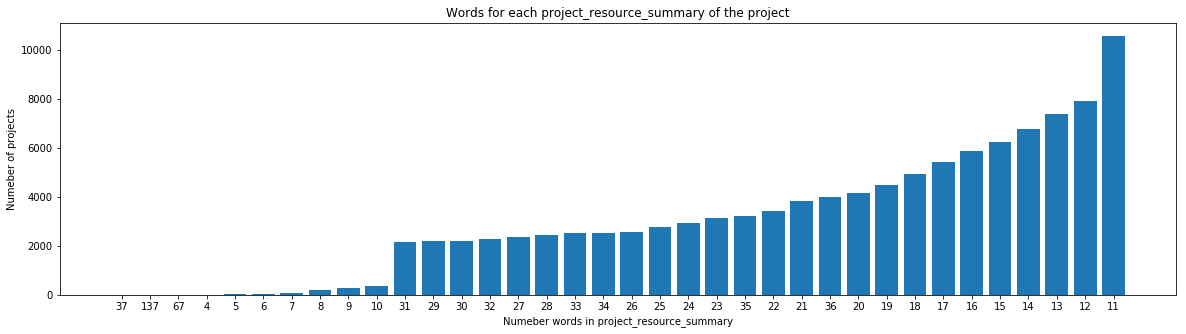

In [43]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
prs_word_count = project_data['project_resource_summary'].str.split().apply(len).value_counts()
print("word counts:",prs_word_count)
prs_word_dict = dict(prs_word_count)
prs_word_dict = dict(sorted(prs_word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(prs_word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(prs_word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project_resource_summary')
plt.title('Words for each project_resource_summary of the project')
plt.xticks(ind, list(prs_word_dict.keys()))
plt.show()

In [44]:
approved_prs_word_count = project_data[project_data['project_is_approved']==1]['project_resource_summary'].str.split().apply(len)
approved_prs_word_count = approved_prs_word_count.values

rejected_prs_word_count = project_data[project_data['project_is_approved']==0]['project_resource_summary'].str.split().apply(len)
rejected_prs_word_count = rejected_prs_word_count.values

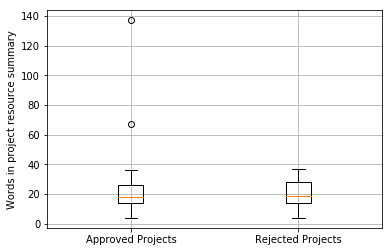

In [45]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_prs_word_count, rejected_prs_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project resource summary')
plt.grid()
plt.show()

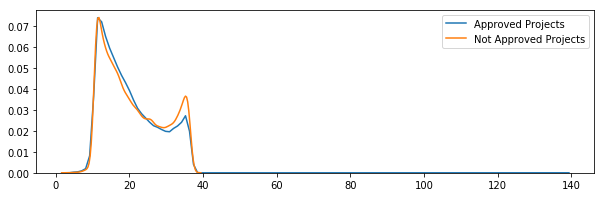

In [46]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_prs_word_count,label="Approved Projects", bw=0.8)
sns.kdeplot(rejected_prs_word_count,label="Not Approved Projects", bw=0.8)
plt.legend()
plt.show()

<b> Summary </b>
* Most of the projects have 11 words in the project resource summary . Typically projects have 12-36 words in their project resource summary . Only a few projects have large word counts like 37,67,137 . 
* The box plot shows that  median of word counts in project resource summary is roughly same for both approved projects and rejected projects . However KDE plot shows  'not approved projects' distribution is slightly higher than the approved projects which implies 'Not approved Projects ' tend to have higher number of words in their 'project_resource_summary' than 'approved projects'

In [47]:
#https://stackoverflow.com/a/19859308/10967428
#https://stackoverflow.com/a/20840816/10967428

def hasNumbers(inputString):
    #return int(bool(re.search(r'\S*\d\S*', inputString)))
    return int(bool(re.search(r'\d+\.?\d', inputString)))
        
#r'\d+\.?\d*
print(hasNumbers("he has wolves and  horses. he left the town with 57 horses"))


1


In [48]:


res=[]
#project_data['project_resource_summary']
for i in project_data['project_resource_summary']:
    res.append(hasNumbers(i))
project_data['presence_of_the_numerical_digits']=res
np.count_nonzero(project_data[project_data['project_is_approved']==1]['presence_of_the_numerical_digits'].values)


project_data['presence_of_the_numerical_digits'].value_counts()

0    102572
1      6676
Name: presence_of_the_numerical_digits, dtype: int64

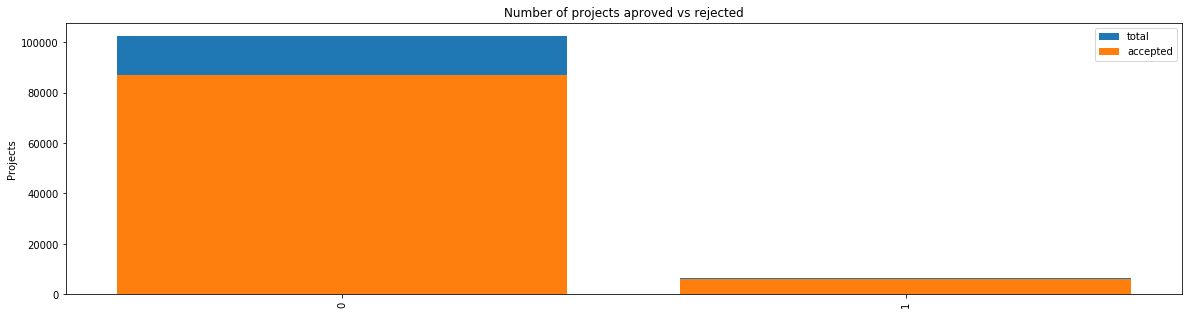

   presence_of_the_numerical_digits  project_is_approved   total       Avg
0                                 0                86753  102572  0.845777
1                                 1                 5953    6676  0.891702
   presence_of_the_numerical_digits  project_is_approved   total       Avg
0                                 0                86753  102572  0.845777
1                                 1                 5953    6676  0.891702


In [49]:
univariate_barplots(project_data, 'presence_of_the_numerical_digits', 'project_is_approved')

<b> Summary </b>
* Most of the projects lack numerical data in the project_resource_summary. 
* Having said that, Most of the projects that has numerical data in their project_resource_summary ,has higher acceptance rate (almost 90%). 
* The acceptance rate of the projects with no numerical data in project_resource_summary matches with average acceptance rate

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [50]:
project_data.head(2)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2  \
0  \"The limits of your language are the limits o...   
1  The projector we need for our school is very c...   

                 ...                project_essay_4  \
0                ...                            NaN   
1                ...                            NaN   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

  teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            0                    0   
1                                            7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  price  quantity  \
0  My students are English learners that are work...  154.6        23   
1  Our students arrive to our school eager to lea...  299.0         1   

   presence_of_the_numerical_digits  
0                                 0  
1                                 0  

[2 rows x 21 columns]

In [51]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [52]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [53]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [54]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [55]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [56]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [57]:
# Combining all the above statemennts 

from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())


'\nfrom tqdm import tqdm\npreprocessed_essays = []\n# tqdm is for printing the status bar\nfor sentance in tqdm(project_data[\'essay\'].values):\n    sent = decontracted(sentance)\n    sent = sent.replace(\'\\r\', \' \')\n    sent = sent.replace(\'\\"\', \' \')\n    sent = sent.replace(\'\\n\', \' \')\n    sent = re.sub(\'[^A-Za-z0-9]+\', \' \', sent)\n    # https://gist.github.com/sebleier/554280\n    sent = \' \'.join(e for e in sent.split() if e not in stopwords)\n    preprocessed_essays.append(sent.lower().strip())\n'

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [59]:
project_data.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects',
       'project_is_approved', 'clean_categories', 'clean_subcategories',
       'essay', 'price', 'quantity', 'presence_of_the_numerical_digits'],
      dtype=object)

In [60]:
# printing some random essays.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)


Educational Support for English Learners at Home
More Movement with Hokki Stools
Sailing Into a Super 4th Grade Year
We Need To Move It While We Input It!
Inspiring Minds by Enhancing the Educational Experience


In [61]:
sent = decontracted(project_data['project_title'].values[20000])
print(sent)
print("="*50)

We Need To Move It While We Input It!


In [62]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

We Need To Move It While We Input It!


In [63]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

We Need To Move It While We Input It 


In [64]:
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:03<00:00, 31831.91it/s]


## 1. 4 Preparing data for models

In [65]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'presence_of_the_numerical_digits'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [66]:
# we use count vectorizer to convert the values into one hot encoded features
# clean categories 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [67]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [68]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also

In [69]:
#state
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())


state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",state_one_hot.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encodig  (109248, 51)


In [70]:
# removing Nan
#https://discuss.analyticsvidhya.com/t/how-to-handle-missing-values-of-categorical-variables/310/3
# Replacing the NaN values with 'Mrs' as it appears most frequently
#https://stackoverflow.com/a/39891994/10967428
print(project_data['teacher_prefix'].value_counts())
print(project_data[project_data['teacher_prefix'].isnull()]['teacher_prefix'])
print("="*100)


project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')

#teacher prefix
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values)
print(vectorizer.get_feature_names())


teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)


Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64
7820     NaN
30368    NaN
57654    NaN
Name: teacher_prefix, dtype: object
['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']
Shape of matrix after one hot encodig  (109248, 5)


In [71]:
print(project_data[project_data['teacher_prefix'].isnull()]['teacher_prefix'])

Series([], Name: teacher_prefix, dtype: object)


In [73]:

#project_grade_category

#Vocubulary setup
project_data['project_grade_category']=project_data['project_grade_category'].fillna('')
counter=Counter()
for words in project_data['project_grade_category'].values:
    counter.update(words.split('\n'))
project_grade_counter_dict=dict(counter)  
project_grade_cat_dict=dict(sorted(project_grade_counter_dict.items(),key=lambda x:x[1]))

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())


project_grade_cat_one_hot = vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_cat_one_hot.shape)
  



['Grades 9-12', 'Grades 6-8', 'Grades 3-5', 'Grades PreK-2']
Shape of matrix after one hot encodig  (109248, 4)


### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [74]:

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)


'\n# We are considering only the words which appeared in at least 10 documents(rows or projects).\nvectorizer = CountVectorizer(min_df=10)\ntext_bow = vectorizer.fit_transform(preprocessed_essays)\nprint("Shape of matrix after one hot encodig ",text_bow.shape)\n'

<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [76]:
# Similarly you can vectorize for title also

In [77]:
vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",title_bow.shape)

Shape of matrix after one hot encodig  (109248, 3329)


#### 1.4.2.3 TFIDF vectorizer

In [78]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)


'\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nvectorizer = TfidfVectorizer(min_df=10)\ntext_tfidf = vectorizer.fit_transform(preprocessed_essays)\nprint("Shape of matrix after one hot encodig ",text_tfidf.shape)\n'

<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",title_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 3329)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [81]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [82]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('./glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [83]:

# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))


'\n# average Word2Vec\n# compute average word2vec for each review.\navg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list\nfor sentence in tqdm(preprocessed_essays): # for each review/sentence\n    vector = np.zeros(300) # as word vectors are of zero length\n    cnt_words =0; # num of words with a valid vector in the sentence/review\n    for word in sentence.split(): # for each word in a review/sentence\n        if word in glove_words:\n            vector += model[word]\n            cnt_words += 1\n    if cnt_words != 0:\n        vector /= cnt_words\n    avg_w2v_vectors.append(vector)\n\nprint(len(avg_w2v_vectors))\nprint(len(avg_w2v_vectors[0]))\n'

<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [84]:


#average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_title= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title.append(vector)

print(len(avg_w2v_vectors_title))
print(len(avg_w2v_vectors_title[0]))

100%|██████████| 109248/109248 [00:02<00:00, 53391.55it/s]

109248
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [85]:
 S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


' S = ["abc def pqr", "def def def abc", "pqr pqr def"]\ntfidf_model = TfidfVectorizer()\ntfidf_model.fit(preprocessed_essays)\n# we are converting a dictionary with word as a key, and the idf as a value\ndictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))\ntfidf_words = set(tfidf_model.get_feature_names())\n'

In [86]:

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))


'\n# average Word2Vec\n# compute average word2vec for each review.\ntfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list\nfor sentence in tqdm(preprocessed_essays): # for each review/sentence\n    vector = np.zeros(300) # as word vectors are of zero length\n    tf_idf_weight =0; # num of words with a valid vector in the sentence/review\n    for word in sentence.split(): # for each word in a review/sentence\n        if (word in glove_words) and (word in tfidf_words):\n            vec = model[word] # getting the vector for each word\n            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))\n            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word\n            vector += (vec * tf_idf) # calculating tfidf weighted w2v\n            tf_idf_weight += tf_idf\n    if tf_idf_weight != 0:\n        vector /= tf_idf_weight\n    tf

<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [87]:
S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [88]:
# Similarly you can vectorize for title also

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles.append(vector)

print(len(tfidf_w2v_vectors_titles))
print(len(tfidf_w2v_vectors_titles[0]))

100%|██████████| 109248/109248 [00:04<00:00, 22342.84it/s]

109248
300


### 1.4.3 Vectorizing Numerical features

In [89]:
# price

# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [90]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = StandardScaler()
quantity_scalar.fit(project_data['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_standardized = quantity_scalar.transform(project_data['quantity'].values.reshape(-1, 1))

Mean : 16.965610354422964, Standard deviation : 26.182821919093175


/home/swapnodoot/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/home/swapnodoot/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [91]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

teacher_num_pre_posted_projects_scalar = StandardScaler()
teacher_num_pre_posted_projects_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_num_pre_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_num_pre_posted_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_num_pre_posted_projects_standardized =teacher_num_pre_posted_projects_scalar.transform(project_data['quantity'].values.reshape(-1, 1))

Mean : 11.153165275336848, Standard deviation : 27.77702641477403


/home/swapnodoot/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/home/swapnodoot/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [92]:
#categorial features 
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)
print("Shape of matrix after one hot encodig ",state_one_hot.shape)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)
print("Shape of matrix after one hot encodig ",project_grade_cat_one_hot.shape)
  
print("shape of title_bow:",title_bow.shape)
print("shape of title_tfidf:",title_tfidf.shape)



Shape of matrix after one hot encodig  (109248, 9)
Shape of matrix after one hot encodig  (109248, 30)
Shape of matrix after one hot encodig  (109248, 51)
Shape of matrix after one hot encodig  (109248, 5)
Shape of matrix after one hot encodig  (109248, 4)
shape of title_bow: (109248, 3329)
shape of title_tfidf: (109248, 3329)


In [93]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
#with the same hstack function we are concatinating a sparse matrix and a dense matirx 

X = hstack((categories_one_hot, 
            sub_categories_one_hot, 
            title_bow_dense, 
            price_standardized))
data_project_title_bow=hstack((categories_one_hot, 
                               sub_categories_one_hot,
                               state_one_hot,teacher_prefix_one_hot,
                               project_grade_cat_one_hot,
                               quantity_standardized,
                               teacher_num_pre_posted_projects_standardized ,
                               price_standardized,title_bow))
data_project_title_tfidf=hstack((categories_one_hot, 
                                 sub_categories_one_hot,
                                 state_one_hot,
                                 teacher_prefix_one_hot,
                                 project_grade_cat_one_hot,
                                 quantity_standardized,
                                 teacher_num_pre_posted_projects_standardized ,
                                 price_standardized,
                                 title_tfidf))
data_project_title_avg_w2v=hstack((categories_one_hot,
                                   sub_categories_one_hot,
                                   state_one_hot,
                                   teacher_prefix_one_hot,
                                   project_grade_cat_one_hot,
                                   quantity_standardized,
                                   teacher_num_pre_posted_projects_standardized , 
                                   price_standardized,
                                   avg_w2v_vectors_title))
data_project_title_tfidf_w2v=hstack((categories_one_hot,
                                     sub_categories_one_hot,
                                     state_one_hot,
                                     teacher_prefix_one_hot,
                                     project_grade_cat_one_hot,
                                     quantity_standardized,
                                     teacher_num_pre_posted_projects_standardized ,
                                     price_standardized,
                                     tfidf_w2v_vectors_titles))



<h1>Apply TSNE</h1>

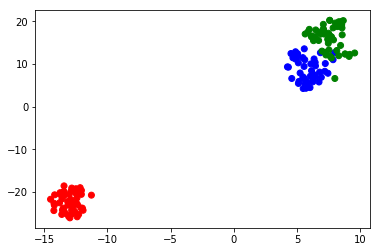

In [94]:
# this is the example code for TSNE
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris['data']
y = iris['target']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

In [95]:
 #-------------------title_bow-------------------------#
#https://stackoverflow.com/a/54832428/10967428
X=hstack((categories_one_hot, sub_categories_one_hot,state_one_hot,teacher_prefix_one_hot,project_grade_cat_one_hot,quantity_standardized,teacher_num_pre_posted_projects_standardized , price_standardized,title_bow))
#converting COO to CSR
X=X.tocsr()
# taking 5000 data here due to memory constraint

X_data=X[0:5000,:]
#converting csr to dense 
X_data=X_data.toarray()

from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,perplexity=100)
tsne_data_bow=model.fit_transform(X_data)
label_data=project_data['project_is_approved'].head(5000)
tsne_data_bow=np.vstack((tsne_data_bow.T,label_data)).T
tsne_data_bow_df=pd.DataFrame(tsne_data_bow,columns=('Dim-1','Dim-2','Label'))

print(tsne_data_bow_df.shape)



(5000, 3)


In [96]:
#https://stackoverflow.com/a/29814281/10967428
sns.FacetGrid(tsne_data_bow_df,hue='Label',size=10).\
map(plt.scatter,'Dim-1','Dim-2').add_legend().fig.suptitle('TSNE with BOW encoding of project_title feature')
plt.show()

* <b> Observation </b>
    * This plot shows loads of overlapping of the points . It's difficult to come to any conclusion from these points as they are very scattered and that's doesn't help in classification. 

<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

In [97]:
X=hstack((categories_one_hot, sub_categories_one_hot,state_one_hot,teacher_prefix_one_hot,project_grade_cat_one_hot,quantity_standardized,teacher_num_pre_posted_projects_standardized , price_standardized,title_tfidf))
X=X.tocsr()
# taking 5000 data here due to memory constraint

X_data=X[0:5000,:]
#converting csr to dense 
X_data=X_data.toarray()


from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,perplexity=100)
tsne_data_tfidf=model.fit_transform(X_data)
label_data=project_data['project_is_approved'].head(5000)
tsne_data_tfidf=np.vstack((tsne_data_tfidf.T,label_data)).T
tsne_data_tfidf_df=pd.DataFrame(tsne_data_tfidf,columns=('Dim-1','Dim-2','Label'))

print(tsne_data_tfidf_df.shape)


(5000, 3)


In [98]:
sns.FacetGrid(tsne_data_tfidf_df,hue='Label',size=10).\
map(plt.scatter,'Dim-1','Dim-2').add_legend().fig.suptitle('TSNE with TFIDF encoding of project_title feature')
plt.show()

* <b> Observation </b>
    * Points overlap a lot . We can't come up with any conclusion

<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

In [99]:
X=hstack((categories_one_hot, sub_categories_one_hot,state_one_hot,teacher_prefix_one_hot,project_grade_cat_one_hot,quantity_standardized,teacher_num_pre_posted_projects_standardized , price_standardized,avg_w2v_vectors_title))

#X=hstack((categories_one_hot, sub_categories_one_hot,state_one_hot,teacher_prefix_one_hot,project_grade_cat_one_hot,quantity_standardized,teacher_num_pre_posted_projects_standardized , price_standardized,title_tfidf))
X=X.tocsr()
# taking 5000 data here due to memory constraint

X_data=X[0:5000,:]
#converting csr to dense 
X_data=X_data.toarray()


from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,perplexity=100)
tsne_data_avg=model.fit_transform(X_data)
label_data=project_data['project_is_approved'].head(5000)
tsne_data_avg=np.vstack((tsne_data_avg.T,label_data)).T
tsne_data_avg_df=pd.DataFrame(tsne_data_avg,columns=('Dim-1','Dim-2','Label'))

print(tsne_data_avg_df.shape)


(5000, 3)


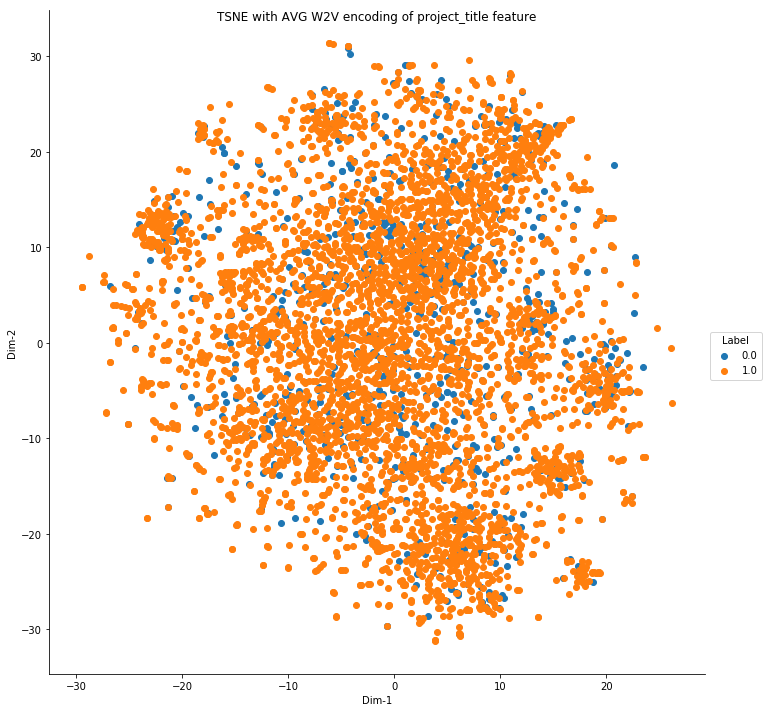

In [100]:
sns.FacetGrid(tsne_data_avg_df,hue='Label',size=10).\
map(plt.scatter,'Dim-1','Dim-2').add_legend().fig.suptitle('TSNE with AVG W2V encoding of project_title feature ')
plt.show()


* <b> Observation </b>
    * This plot doesn't show any cluster formation and have significant amount of overlapping. it's not possible to come up with any conclusion. 

<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

In [101]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

X=hstack((categories_one_hot, sub_categories_one_hot,state_one_hot,teacher_prefix_one_hot,project_grade_cat_one_hot,quantity_standardized,teacher_num_pre_posted_projects_standardized , price_standardized,tfidf_w2v_vectors_titles))

#X=hstack((categories_one_hot, sub_categories_one_hot,state_one_hot,teacher_prefix_one_hot,project_grade_cat_one_hot,quantity_standardized,teacher_num_pre_posted_projects_standardized , price_standardized,title_tfidf))
X=X.tocsr()
# taking 5000 data here due to memory constraint

X_data=X[0:5000,:]
#converting csr to dense 
X_data=X_data.toarray()


from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,perplexity=100)
tsne_data_tfidfw=model.fit_transform(X_data)
label_data=project_data['project_is_approved'].head(5000)
tsne_data_tfidfw=np.vstack((tsne_data_tfidfw.T,label_data)).T
tsne_data_tfidfw_df=pd.DataFrame(tsne_data_tfidfw,columns=('Dim-1','Dim-2','Label'))

print(tsne_data_tfidf_df.shape)
##title_bow,title_tfidf,avg_w2v_vectors_title,tfidf_w2v_vectors_titles



(5000, 3)


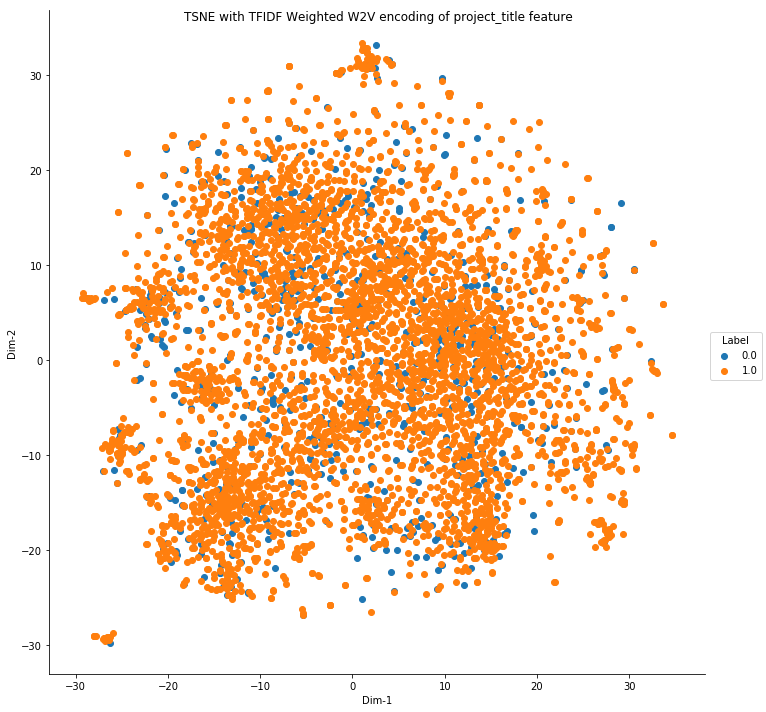

In [102]:
sns.FacetGrid(tsne_data_tfidfw_df,hue='Label',size=10).\
map(plt.scatter,'Dim-1','Dim-2').add_legend().fig.suptitle('TSNE with TFIDF Weighted W2V encoding of project_title feature')
plt.show()


* <b> Observation </b>
    * This plot doesn't show any cluster formation and have significant amount of overlapping. it's not possible to come up with any conclusion. 

# Concatenate all the features and Apply TNSE on the final data matrix


In [103]:
X=hstack((categories_one_hot, sub_categories_one_hot,state_one_hot,teacher_prefix_one_hot,project_grade_cat_one_hot,quantity_standardized,teacher_num_pre_posted_projects_standardized , price_standardized,title_bow,title_tfidf,avg_w2v_vectors_title,tfidf_w2v_vectors_titles))

#X=hstack((categories_one_hot, sub_categories_one_hot,state_one_hot,teacher_prefix_one_hot,project_grade_cat_one_hot,quantity_standardized,teacher_num_pre_posted_projects_standardized , price_standardized,title_tfidf))
X=X.tocsr()
# taking 5000 data here due to memory constraint

X_data=X[0:5000,:]
#converting csr to dense 
X_data=X_data.toarray()


from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,perplexity=100)
tsne_final_data=model.fit_transform(X_data)
label_data=project_data['project_is_approved'].head(5000)
tsne_final_data=np.vstack((tsne_final_data.T,label_data)).T
tsne_final_data_df=pd.DataFrame(tsne_final_data,columns=('Dim-1','Dim-2','Label'))

print(tsne_final_data_df.shape)



(5000, 3)


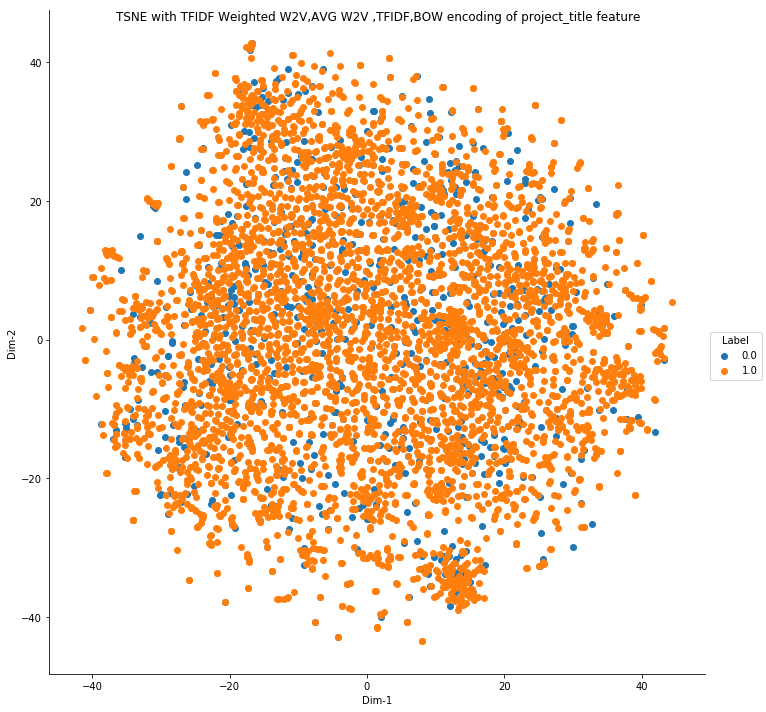

In [104]:
sns.FacetGrid(tsne_final_data_df,hue='Label',size=10).\
map(plt.scatter,'Dim-1','Dim-2').add_legend().fig.suptitle('TSNE with TFIDF Weighted W2V,AVG W2V ,TFIDF,BOW encoding of project_title feature')
plt.show()


* <b> Observation </b>
    * This plot doesn't show any cluster formation and have significant amount of overlapping. it's not possible to come up with any conclusion. 

<h2> 2.5 Summary </h2>

* The dataset is imbalanced dataset as it contains 85% positive points( number of accepted projects) and 15% of negative points( rejected/not accepted projects).

* The analysis shows that:
    * The average acceptance rate is 84.85% and although the rate varies from state to state, every state has greater than 80% acceptance rate.
    * California(CA) leads the chart in terms of number of project submission(15388) and Vermont(VT) has the least number of submitted projects(80).
    * Projects from Delaware(DL) has highest acceptance rate(89.79%) . 
    * Teachers with different prefix submitted projects where number of projects submitted by the female married teachers is highest( 57269). even they lead in terms of the acceptance rate as well.(85.5%)
    * Most of the projects that have been accepted are for Grades 3-5(85.4%). A very few projects for Grades 9-12 has been accepted(83.7%).
    * most of the projects falls into literacy and language category(23655).However the projects  falls into the category 'Warmth care_hunger' shows highest rate of approval (92.5%)
    * Generally, projects have 4 words in their title. Having said that , the accepted projects tend to have slightly more number of words than the rejected projects.
    * Essay plays vital role in selection. The accepted projects have higher number words in essays than that of rejected projects. 
    * Reject projects tend to cost higher than accepted projects . No projects should be more than \$ 10,000.
    * It's not mandatory to have previous record of submitting projects as teachers with 0 prior project record has 82% of acceptance.
    * Most projects have 11 words in their project resource summary. Rejected projects tend to have higher number of words in project resource summary. Numerical data is absent in most of the project resource summary. However, the projects with numerical data in their project_resource_summary has higher acceptance rate(around 90%).
    
    
*  Visulization of titles in project with Bag of words , TFIDF, avg Word2Vec, TFIDF weighted Word2Vec shows significant amount of overlaps and plots don't show any clusters. So , we can't infer any information from these plots as far as classification of points is concerned . 
    
